In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/plot_styles/global_plotting_style.mplstyle")

In [2]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import read_shuffling_data

In [3]:
unshuffled_data_dir = "/project/fudenber_735/akitaX1_analyses_data/background_generation/sequence_shuffling/shuffled_vs_unshuffled/unshuffled/"

In [4]:
shuffled_data_dir = "/project/fudenber_735/akitaX1_analyses_data/background_generation/sequence_shuffling/shuffled_vs_unshuffled/shuffled/"

In [5]:
df = read_shuffling_data(unshuffled_data_dir)

In [6]:
df = df.drop(columns=[f"SCD_m{i}" for i in range(4)])

In [7]:
df = df.rename(columns={"SCD": "unshuffled_SCD"})

In [8]:
shuffled_df = read_shuffling_data(shuffled_data_dir)

In [9]:
df["shuffled_SCD"] = shuffled_df["SCD"]

In [ ]:
# df

In [10]:
df[["unshuffled_SCD", "shuffled_SCD"]].var()

unshuffled_SCD    246.250000
shuffled_SCD       25.265625
dtype: float16

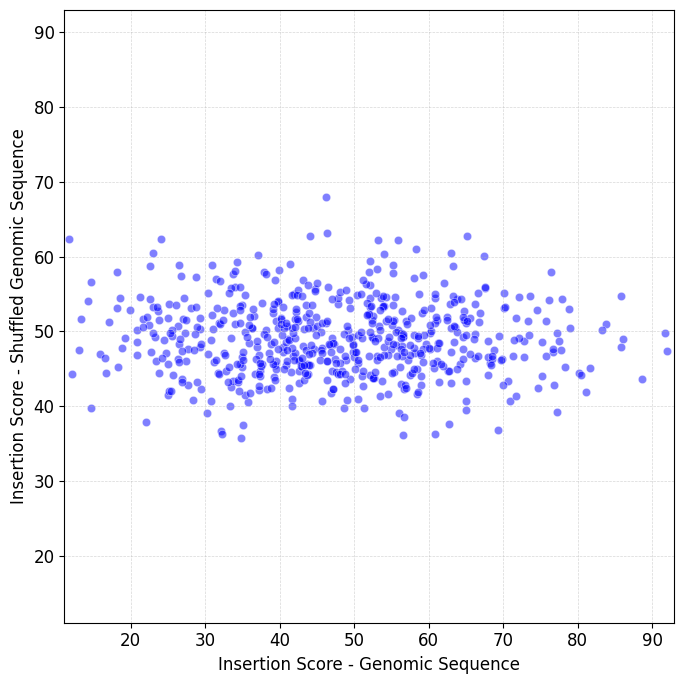

In [14]:
plt.figure(figsize=(7, 7))
plt.scatter(df['unshuffled_SCD'], df['shuffled_SCD'], alpha=0.5, edgecolors='w', linewidth=0.5, color='blue')

# Calculate the combined min and max of both columns for a common range
combined_min = min(df['unshuffled_SCD'].min(), df['shuffled_SCD'].min())+1
combined_max = max(df['unshuffled_SCD'].max(), df['shuffled_SCD'].max())+1

# Set the same range for both axes
plt.xlim(combined_min, combined_max)
plt.ylim(combined_min, combined_max)

# Adding a line of equality
x = np.linspace(combined_min, combined_max)

plt.xlabel('Insertion Score - Genomic Sequence')
plt.ylabel('Insertion Score - Shuffled Genomic Sequence')

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.savefig("shuffled_vs_unshuffled.pdf", format="pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()